In [1]:
import pandas as pd
# Load the dataset
file_path = 'Final_data_file.csv'  # Update the path accordingly
data = pd.read_csv(file_path)

# Display the first few rows of the dataframe
data.head()

C:\Users\conor\AppData\Roaming\Python\Python311\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


,Year,Denmark_Public_Debt_Pc_of_GDP,Ireland_Public_Debt_Pc_of_GDP,United Kingdom_Public_Debt_Pc_of_GDP,Denmark_Inflation,United Kingdom_Inflation,Ireland_Inflation,Denmark_GDP,United Kingdom_GDP,Ireland_GDP
0,1970,7.62,41.65,73.24,6.514841,6.366568,8.207190,1.596842,4.308886,3.469886
1,1971,7.72,39.85,65.55,5.869870,9.444837,8.961749,3.004996,3.504717,3.469886
2,1972,6.64,37.34,62.04,6.562361,7.071098,8.605817,3.929385,4.321668,6.489808
3,1973,5.85,35.09,54.56,9.303383,9.196033,11.414850,4.092946,6.523848,4.721428
4,1974,5.08,43.45,51.60,15.275206,16.044011,16.976127,-1.122394,-2.484404,4.260231


In [2]:
#Moving the target variable to the start of the dataframe
data.insert(1, 'Ireland_Public_Debt_Pc_of_GDP2', data['Ireland_Public_Debt_Pc_of_GDP'])
data.drop(columns=['Ireland_Public_Debt_Pc_of_GDP'], inplace=True)
data.rename(columns={'Ireland_Public_Debt_Pc_of_GDP2': 'Ireland_Public_Debt_Pc_of_GDP'}, inplace=True)

data.head()

,Year,Ireland_Public_Debt_Pc_of_GDP,Denmark_Public_Debt_Pc_of_GDP,United Kingdom_Public_Debt_Pc_of_GDP,Denmark_Inflation,United Kingdom_Inflation,Ireland_Inflation,Denmark_GDP,United Kingdom_GDP,Ireland_GDP
0,1970,41.65,7.62,73.24,6.514841,6.366568,8.207190,1.596842,4.308886,3.469886
1,1971,39.85,7.72,65.55,5.869870,9.444837,8.961749,3.004996,3.504717,3.469886
2,1972,37.34,6.64,62.04,6.562361,7.071098,8.605817,3.929385,4.321668,6.489808
3,1973,35.09,5.85,54.56,9.303383,9.196033,11.414850,4.092946,6.523848,4.721428
4,1974,43.45,5.08,51.60,15.275206,16.044011,16.976127,-1.122394,-2.484404,4.260231


In [3]:
import numpy as np
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense, Dropout
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [4]:
train_dates = (data['Year'])

In [5]:
cols = list(data)[1:10]

In [6]:
print(cols)

['Ireland_Public_Debt_Pc_of_GDP', 'Denmark_Public_Debt_Pc_of_GDP', 'United Kingdom_Public_Debt_Pc_of_GDP', 'Denmark_Inflation', 'United Kingdom_Inflation', 'Ireland_Inflation', 'Denmark_GDP', 'United Kingdom_GDP', 'Ireland_GDP']


In [7]:
df_for_training = data[cols].astype(float)

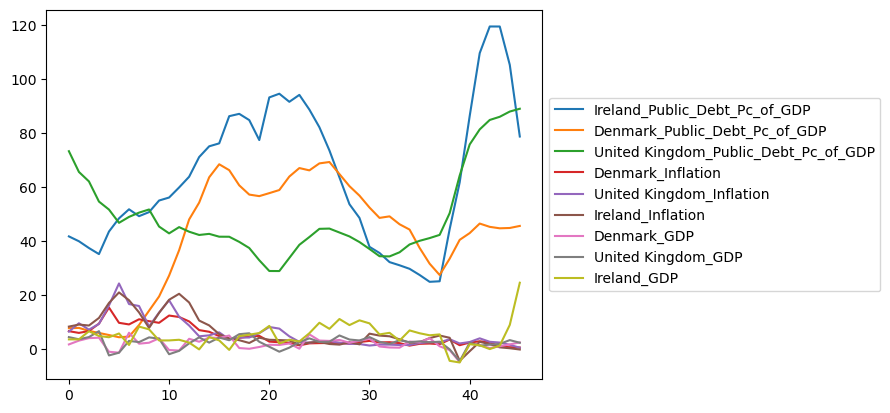

In [8]:
df_for_plot=df_for_training

ax = df_for_plot.plot.line()

# Move the legend to the side
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Show the plot
plt.show()

In [9]:
scaler = StandardScaler()
scaler = scaler.fit(df_for_training)
df_for_training_scaled = scaler.transform(df_for_training)

In [10]:
trainX = []
trainY = []

n_future = 1
n_past = 7

for i in range(n_past, len(df_for_training_scaled) - n_future + 1):
    trainX.append(df_for_training_scaled[i-n_past:i, 0:df_for_training.shape[1]])
    trainY.append(df_for_training_scaled[i+n_future - 1:i+n_future,0])

trainX, trainY = np.array(trainX), np.array(trainY)

print('trainX shape =={}.'.format(trainX.shape))
print('trainY shape =={}.'.format(trainY.shape))

trainX shape ==(39, 7, 9).
trainY shape ==(39, 1).


In [11]:
model = Sequential()
model.add(LSTM(64,activation = 'relu', input_shape=(trainX.shape[1], trainX.shape[2]), return_sequences=True))
model.add(LSTM(32,activation='relu',return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(trainY.shape[1]))

model.compile(optimizer='adam', loss='mse')
model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 7, 64)             18944     
                                                                 
 lstm_1 (LSTM)               (None, 32)                12416     
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 31393 (122.63 KB)
Trainable params: 31393 (122.63 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [12]:
history = model.fit(trainX, trainY, epochs=17, batch_size=16, validation_split=0.1)

Epoch 1/17

3/3 [==============================] - 4s 270ms/step - loss: 0.8146 - val_loss: 2.9336
Epoch 2/17
3/3 [==============================] - 0s 30ms/step - loss: 0.7374 - val_loss: 2.8561
Epoch 3/17
3/3 [==============================] - 0s 30ms/step - loss: 0.6783 - val_loss: 2.7786
Epoch 4/17
3/3 [==============================] - 0s 35ms/step - loss: 0.6616 - val_loss: 2.6829
Epoch 5/17
3/3 [==============================] - 0s 31ms/step - loss: 0.6013 - val_loss: 2.5611
Epoch 6/17
3/3 [==============================] - 0s 31ms/step - loss: 0.5362 - val_loss: 2.4406
Epoch 7/17
3/3 [==============================] - 0s 26ms/step - loss: 0.4788 - val_loss: 2.3029
Epoch 8/17
3/3 [==============================] - 0s 30ms/step - loss: 0.3990 - val_loss: 2.1251
Epoch 9/17
3/3 [==============================] - 0s 30ms/step - loss: 0.3537 - val_loss: 1.9410
Epoch 10/17
3/3 [==============================] - 0s 32ms/step - loss: 0.2970 - val_loss: 1.7032
Epoch 11/17
3/3 [==========

<function matplotlib.pyplot.legend(*args, **kwargs)>

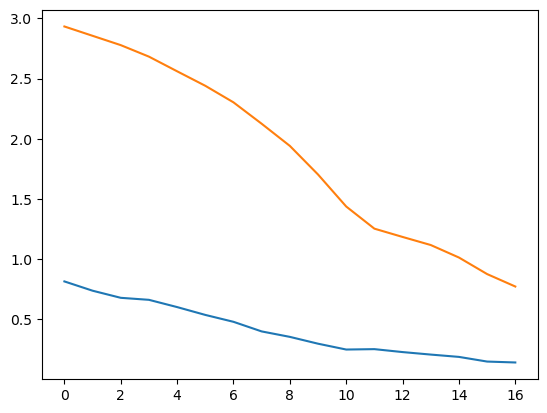

In [13]:
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.legend

In [14]:
n_past = 16
n_days_for_prediction=15  #let us predict past 15 years

#predict_period_dates = pd.date_range(list(train_dates)[-n_past], periods=n_days_for_prediction).tolist()
#print(predict_period_dates)

#Make prediction
prediction = model.predict(trainX[-n_days_for_prediction:]) #shape = (n, 1) where n is the n_days_for_prediction




1/1 [==============================] - 0s 482ms/step


In [15]:
prediction_copies = np.repeat(prediction, df_for_training.shape[1], axis=-1)
y_pred_future = scaler.inverse_transform(prediction_copies)[:,0]

print(y_pred_future)
   

[ 27.230927  24.114777  24.811527  26.381477  31.115185  33.48315
  37.348324  43.234467  53.650436  70.49846   80.21559   89.70483
  98.593636 106.37153  106.23963 ]


In [16]:
dates = train_dates[-n_days_for_prediction:]

predictions = y_pred_future[-n_days_for_prediction:]

# Create a DataFrame from the selected dates and predictions
df_predictions = pd.DataFrame({
    'Year': dates,
    'Predicted_Value': predictions
})
print(df_predictions)

    Year  Predicted_Value
31  2001        27.230927
32  2002        24.114777
33  2003        24.811527
34  2004        26.381477
35  2005        31.115185
36  2006        33.483150
37  2007        37.348324
38  2008        43.234467
39  2009        53.650436
40  2010        70.498459
41  2011        80.215591
42  2012        89.704826
43  2013        98.593636
44  2014       106.371529
45  2015       106.239632


In [17]:
Actual_data = data.iloc[:,0:2]
print(Actual_data)

    Year  Ireland_Public_Debt_Pc_of_GDP
0   1970                          41.65
1   1971                          39.85
2   1972                          37.34
3   1973                          35.09
4   1974                          43.45
5   1975                          48.34
6   1976                          51.70
7   1977                          49.15
8   1978                          50.65
9   1979                          54.95
10  1980                          56.06
11  1981                          59.80
12  1982                          63.77
13  1983                          71.07
14  1984                          75.05
15  1985                          76.14
16  1986                          86.22
17  1987                          87.09
18  1988                          84.77
19  1989                          77.37
20  1990                          93.18
21  1991                          94.55
22  1992                          91.55
23  1993                          94.12


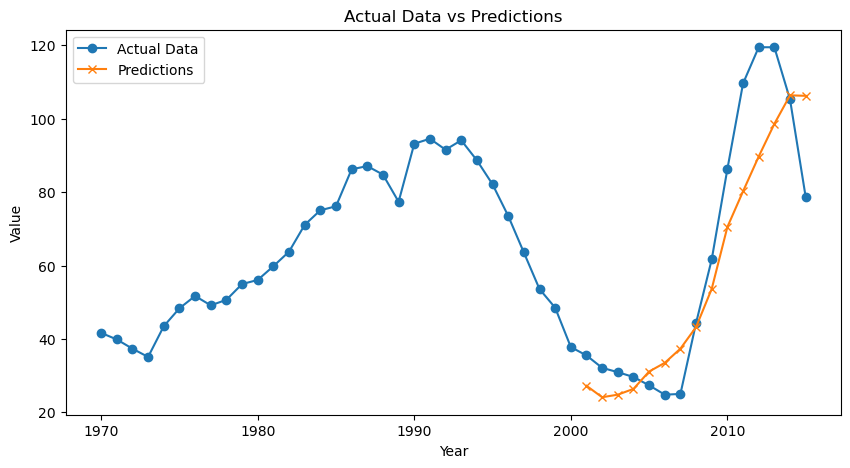

In [18]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))  # Set the figure size for better readability
plt.plot(Actual_data.iloc[:, 0], Actual_data.iloc[:, 1], label='Actual Data', marker='o')
plt.plot(df_predictions.iloc[:, 0], df_predictions.iloc[:, 1], label='Predictions', marker='x')
plt.title('Actual Data vs Predictions')
plt.xlabel('Year')
plt.ylabel('Value')
plt.legend()
plt.show()


In [ ]:
print(Actual_data.iloc[31:,1])
print(df_predictions.iloc[:,1])

In [19]:
from sklearn.metrics import mean_squared_error 
from math import sqrt 
rmse=sqrt(mean_squared_error(Actual_data.iloc[31:,1],df_predictions.iloc[:,1])) 
print(rmse)

15.67332634405451


In [20]:
# Calculate R-squared
from sklearn.metrics import r2_score
r_squared = r2_score(Actual_data.iloc[31:,1], df_predictions.iloc[:,1])
print("R-squared:", r_squared)

R-squared: 0.8108837492964028


In [ ]:
from sklearn.metrics import mean_squared_error 
from math import sqrt 
rmse=sqrt(mean_squared_error(Actual_data.iloc[31:,1],df_predictions.iloc[:,1])) 
print(rmse)

In [ ]:
# Calculate R-squared
from sklearn.metrics import r2_score
r_squared = r2_score(Actual_data.iloc[31:,1], df_predictions.iloc[:,1])
print("R-squared:", r_squared)

